In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ace676d494398eb3591083e29ca5bcb


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

###
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | springhill
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | sehithwa
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | mouzakion
City not found. Skipping...
Processing Record 20 of Set 1 | hilo


Processing Record 35 of Set 4 | goderich
Processing Record 36 of Set 4 | macheng
Processing Record 37 of Set 4 | constitucion
Processing Record 38 of Set 4 | gonbad-e qabus
Processing Record 39 of Set 4 | meyungs
City not found. Skipping...
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | coihaique
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | camocim
Processing Record 45 of Set 4 | puerto leguizamo
Processing Record 46 of Set 4 | mbamba
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | utiroa
City not found. Skipping...
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | nuuk
Processing Record 4 of Set 5 | sora
Processing Record 5 of Set 5 | daru
Processing Record 6 of Set 5 | malwan
City not found. Skipping...
Processing Record 7 

Processing Record 25 of Set 8 | thinadhoo
Processing Record 26 of Set 8 | kurumkan
Processing Record 27 of Set 8 | soyo
Processing Record 28 of Set 8 | cabra
Processing Record 29 of Set 8 | dali
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | gurgan
City not found. Skipping...
Processing Record 34 of Set 8 | santander
Processing Record 35 of Set 8 | sarh
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | acapulco
Processing Record 39 of Set 8 | sandi
Processing Record 40 of Set 8 | esperance
Processing Record 41 of Set 8 | xinzhou
Processing Record 42 of Set 8 | provideniya
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | bolonchen
City not found. Skipping...
Processing Record 45 of Set 8 | weihai
Processing Record 46 of Set 8 | kavaratti
Processing Recor

Processing Record 13 of Set 12 | chernyshevskiy
Processing Record 14 of Set 12 | yulara
Processing Record 15 of Set 12 | redlands
Processing Record 16 of Set 12 | puerto colombia
Processing Record 17 of Set 12 | vangaindrano
Processing Record 18 of Set 12 | saint-pierre
Processing Record 19 of Set 12 | poyarkovo
Processing Record 20 of Set 12 | horki
Processing Record 21 of Set 12 | longlac
City not found. Skipping...
Processing Record 22 of Set 12 | forest lake
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | barranca
Processing Record 27 of Set 12 | lyngdal
Processing Record 28 of Set 12 | formby
Processing Record 29 of Set 12 | slavjanovo
Processing Record 30 of Set 12 | derzhavinsk
Processing Record 31 of Set 12 | deep river
Processing Record 32 of Set 12 | bilibino
Processing Record 33 of Set 12 | susaki
Processing Record 34 of Set 12 | ongole
Processing Record 35 of Set 12 | jieshou

In [7]:
print(len(city_data))

555


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.30,-65.10,70.61,33,50,24.96,AR,2020-11-07 18:16:23
1,Butaritari,3.07,172.79,80.67,74,100,11.41,KI,2020-11-07 18:12:34
2,Mataura,-46.19,168.86,46.00,75,100,10.00,NZ,2020-11-07 18:16:24
3,Arraial Do Cabo,-22.97,-42.03,77.00,73,75,4.70,BR,2020-11-07 18:16:24
4,Bredasdorp,-34.53,20.04,60.80,72,63,9.17,ZA,2020-11-07 18:12:17
5,Lebu,-37.62,-73.65,57.25,58,0,21.21,CL,2020-11-07 18:14:38
6,Guerrero Negro,27.98,-114.06,70.70,61,93,7.99,MX,2020-11-07 18:13:24
7,Qaanaaq,77.48,-69.36,-12.73,71,0,5.86,GL,2020-11-07 18:16:24
8,Springhill,33.01,-93.47,75.99,82,1,4.74,US,2020-11-07 18:13:25
9,Dikson,73.51,80.55,-2.60,89,10,12.24,RU,2020-11-07 18:16:25


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2020-11-07 18:16:23,-43.30,-65.10,70.61,33,50,24.96
1,Butaritari,KI,2020-11-07 18:12:34,3.07,172.79,80.67,74,100,11.41
2,Mataura,NZ,2020-11-07 18:16:24,-46.19,168.86,46.00,75,100,10.00
3,Arraial Do Cabo,BR,2020-11-07 18:16:24,-22.97,-42.03,77.00,73,75,4.70
4,Bredasdorp,ZA,2020-11-07 18:12:17,-34.53,20.04,60.80,72,63,9.17
5,Lebu,CL,2020-11-07 18:14:38,-37.62,-73.65,57.25,58,0,21.21
6,Guerrero Negro,MX,2020-11-07 18:13:24,27.98,-114.06,70.70,61,93,7.99
7,Qaanaaq,GL,2020-11-07 18:16:24,77.48,-69.36,-12.73,71,0,5.86
8,Springhill,US,2020-11-07 18:13:25,33.01,-93.47,75.99,82,1,4.74
9,Dikson,RU,2020-11-07 18:16:25,73.51,80.55,-2.60,89,10,12.24


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

today

'11/07/20'

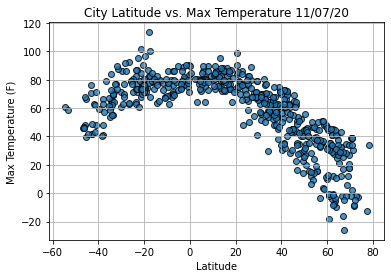

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

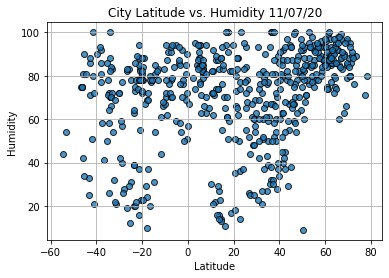

In [14]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

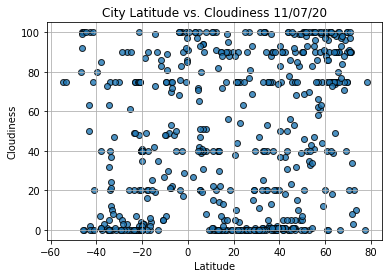

In [15]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

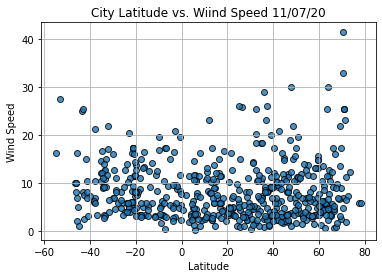

In [16]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wiind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [103]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    # Save the figure.
    plt.show()

In [104]:
index13 = city_data_df.loc[13]
index13

City                     Lorengau
Country                        PG
Date          2020-11-07 18:16:25
Lat                         -2.02
Lng                        147.27
Max Temp                    81.23
Humidity                       76
Cloudiness                     17
Wind Speed                   8.75
Name: 13, dtype: object

In [105]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2020-11-07 18:12:34,3.07,172.79,80.67,74,100,11.41
6,Guerrero Negro,MX,2020-11-07 18:13:24,27.98,-114.06,70.70,61,93,7.99
7,Qaanaaq,GL,2020-11-07 18:16:24,77.48,-69.36,-12.73,71,0,5.86
8,Springhill,US,2020-11-07 18:13:25,33.01,-93.47,75.99,82,1,4.74
9,Dikson,RU,2020-11-07 18:16:25,73.51,80.55,-2.60,89,10,12.24
...,...,...,...,...,...,...,...,...,...
549,Clarksville,US,2020-11-07 18:17:42,36.53,-87.36,75.20,50,1,8.05
551,Sokolovyy,RU,2020-11-07 18:17:42,51.57,45.83,39.99,71,100,11.01
552,Weihe,CN,2020-11-07 18:17:42,33.00,105.32,50.11,52,75,2.28
553,Ulaangom,MN,2020-11-07 18:17:42,49.98,92.07,25.34,94,7,1.52


In [106]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2020-11-07 18:12:34,3.07,172.79,80.67,74,100,11.41
6,Guerrero Negro,MX,2020-11-07 18:13:24,27.98,-114.06,70.70,61,93,7.99
7,Qaanaaq,GL,2020-11-07 18:16:24,77.48,-69.36,-12.73,71,0,5.86
8,Springhill,US,2020-11-07 18:13:25,33.01,-93.47,75.99,82,1,4.74
9,Dikson,RU,2020-11-07 18:16:25,73.51,80.55,-2.60,89,10,12.24


In [107]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2020-11-07 18:16:23,-43.30,-65.10,70.61,33,50,24.96
2,Mataura,NZ,2020-11-07 18:16:24,-46.19,168.86,46.00,75,100,10.00
3,Arraial Do Cabo,BR,2020-11-07 18:16:24,-22.97,-42.03,77.00,73,75,4.70
4,Bredasdorp,ZA,2020-11-07 18:12:17,-34.53,20.04,60.80,72,63,9.17
5,Lebu,CL,2020-11-07 18:14:38,-37.62,-73.65,57.25,58,0,21.21


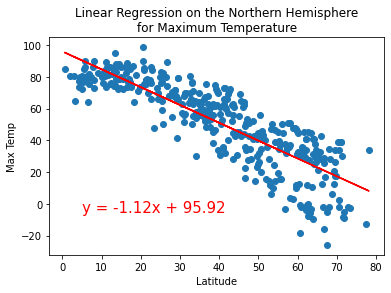

<Figure size 432x288 with 0 Axes>

In [108]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(5,-5))
# Save the figure.
plt.savefig("weather_data/Fig5.png")

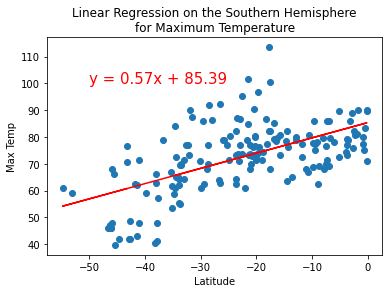

In [109]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,100))

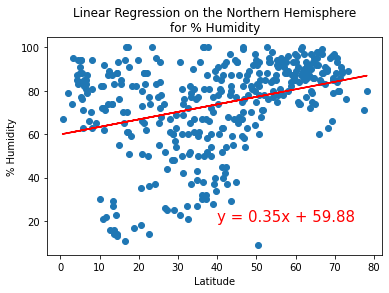

In [110]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,20))

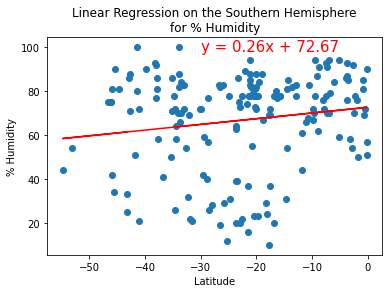

In [111]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-30,98))

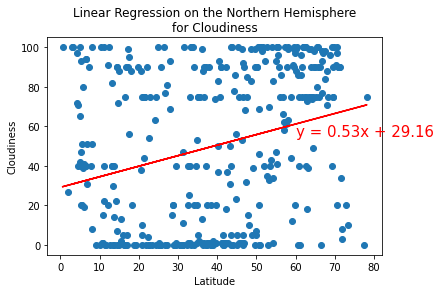

In [112]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness',(60,55))

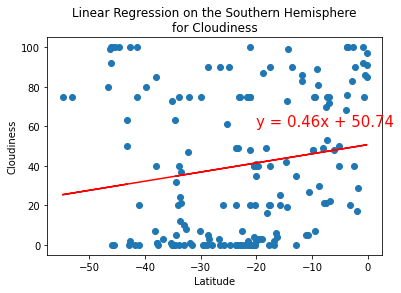

In [113]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Cloudiness', 'Cloudiness',(-20,60))

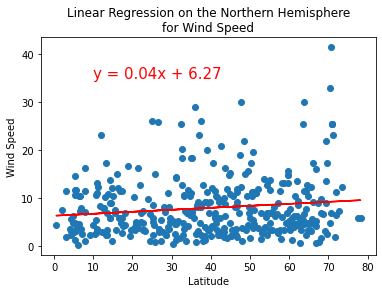

In [114]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(10,35))

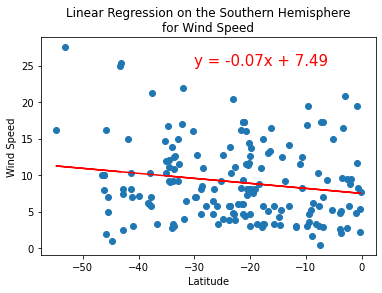

In [115]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-30,25))